In [139]:
#Import Libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


#Import dataset
dataset=pd.read_csv("/content/Bank_data.csv")
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

#Data preprocessing
#Apply one hot encoding to categorical columns and drop one column to avoid dummy variable trap
x=pd.get_dummies(x,columns=['Geography','Gender'],drop_first=True)


#Perform train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


#Standardized data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [140]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [141]:
x_train

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming x_train and y_train are your training features and labels, respectively

# Initializing ANN
classifier = Sequential()

# Adding input layer and first hidden layer
# Ensure input_dim matches the number of features in x_train
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=x_train.shape[1]))


# Output layer for binary classification with sigmoid activation
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the model
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
history=classifier.fit(x_train, y_train, batch_size=10, epochs=10,validation_split=0.2)

# Making predictions on the scaled x_test finding class probabilities
predictions = classifier.predict(x_test)


Epoch 1/10
640/640 [==============================] - 3s 4ms/step - loss: 0.5283 - accuracy: 0.7936 - val_loss: 0.4360 - val_accuracy: 0.7975
Epoch 2/10
640/640 [==============================] - 2s 2ms/step - loss: 0.4225 - accuracy: 0.8178 - val_loss: 0.4174 - val_accuracy: 0.8213
Epoch 3/10
640/640 [==============================] - 2s 2ms/step - loss: 0.4101 - accuracy: 0.8275 - val_loss: 0.4067 - val_accuracy: 0.8206
Epoch 4/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.8269 - val_loss: 0.3978 - val_accuracy: 0.8244
Epoch 5/10
640/640 [==============================] - 2s 3ms/step - loss: 0.3965 - accuracy: 0.8295 - val_loss: 0.3931 - val_accuracy: 0.8250
Epoch 6/10
640/640 [==============================] - 2s 2ms/step - loss: 0.3918 - accuracy: 0.8295 - val_loss: 0.3862 - val_accuracy: 0.8256
Epoch 7/10
640/640 [==============================] - 3s 5ms/step - loss: 0.3875 - accuracy: 0.8309 - val_loss: 0.3818 - val_accuracy: 0.8281
Epoch 

In [143]:
 history.history

{'loss': [0.5283356308937073,
  0.42250263690948486,
  0.4101403057575226,
  0.4025369882583618,
  0.3964739143848419,
  0.3917967975139618,
  0.3875361382961273,
  0.3844606876373291,
  0.3822403848171234,
  0.37966227531433105],
 'accuracy': [0.7935937643051147,
  0.8178125023841858,
  0.8274999856948853,
  0.8268749713897705,
  0.8295312523841858,
  0.8295312523841858,
  0.8309375047683716,
  0.8307812213897705,
  0.8304687738418579,
  0.8298437595367432],
 'val_loss': [0.4360042214393616,
  0.4174322783946991,
  0.40669554471969604,
  0.39775294065475464,
  0.3930712044239044,
  0.3861798048019409,
  0.38177818059921265,
  0.3792022466659546,
  0.3769725561141968,
  0.37546536326408386],
 'val_accuracy': [0.7975000143051147,
  0.8212500214576721,
  0.8206250071525574,
  0.8243749737739563,
  0.824999988079071,
  0.8256250023841858,
  0.828125,
  0.8274999856948853,
  0.8268749713897705,
  0.8262500166893005]}

In [146]:
#Converting class probabilities into class values
import numpy as np
y_pred=np.where(predictions>0.5,1,0)
y_pred=y_pred.ravel()

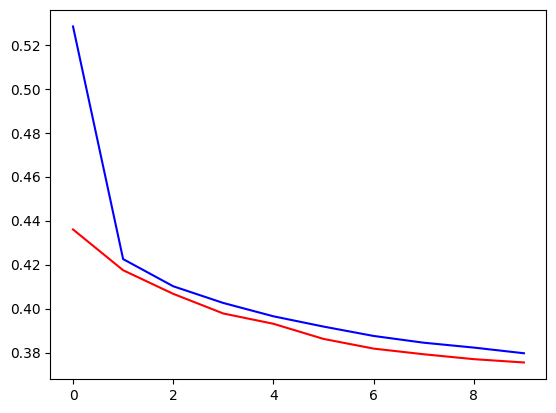

In [147]:
#Plot the loss and validation_loss for different epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')

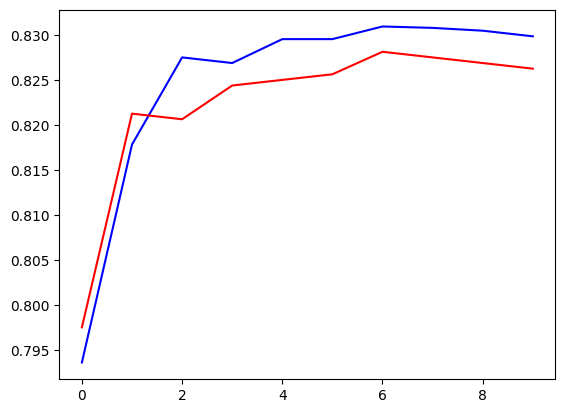

In [148]:

#Plot accuracy and validation accuracy for different epochs
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')

In [149]:

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(f"Accuracy score:{score*100}")

Accuracy score:83.3


In [150]:
#Predicting test set results
y_pred=classifier.predict(x_test)

#Convert probability into binary class values by comparing with threshold
import numpy as np
y_pred=np.where(y_pred>0.5,1,0).ravel()


63/63 [==============================] - 0s 2ms/step


In [151]:

#Making confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1548,   37],
       [ 297,  118]])

**Train on different batch_sizes**





In [158]:
classifier.fit(x_train, y_train, batch_size=2, epochs=10,validation_split=0.2)


Epoch 1/10
3200/3200 [==============================] - 17s 5ms/step - loss: 0.3691 - accuracy: 0.8483 - val_loss: 0.3639 - val_accuracy: 0.8438
Epoch 2/10
3200/3200 [==============================] - 20s 6ms/step - loss: 0.3639 - accuracy: 0.8509 - val_loss: 0.3626 - val_accuracy: 0.8431
Epoch 3/10
3200/3200 [==============================] - 12s 4ms/step - loss: 0.3630 - accuracy: 0.8505 - val_loss: 0.3605 - val_accuracy: 0.8500
Epoch 4/10
3200/3200 [==============================] - 12s 4ms/step - loss: 0.3610 - accuracy: 0.8516 - val_loss: 0.3583 - val_accuracy: 0.8456
Epoch 5/10
3200/3200 [==============================] - 14s 4ms/step - loss: 0.3600 - accuracy: 0.8533 - val_loss: 0.3599 - val_accuracy: 0.8444
Epoch 6/10
3200/3200 [==============================] - 17s 5ms/step - loss: 0.3596 - accuracy: 0.8528 - val_loss: 0.3570 - val_accuracy: 0.8487
Epoch 7/10
3200/3200 [==============================] - 14s 5ms/step - loss: 0.3574 - accuracy: 0.8548 - val_loss: 0.3568 - val_ac

In [164]:
y_pred=classifier.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)

63/63 [==============================] - 0s 3ms/step


In [166]:
score=accuracy_score(y_test,y_pred)
print(f"Accuracy score:{score*100}")

Accuracy score:85.2


In [167]:
classifier.fit(x_train, y_train, batch_size=8, epochs=10,validation_split=0.2)


Epoch 1/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3522 - accuracy: 0.8567 - val_loss: 0.3548 - val_accuracy: 0.8469
Epoch 2/10
800/800 [==============================] - 2s 3ms/step - loss: 0.3518 - accuracy: 0.8548 - val_loss: 0.3552 - val_accuracy: 0.8487
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 0.3513 - accuracy: 0.8567 - val_loss: 0.3586 - val_accuracy: 0.8462
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 0.3509 - accuracy: 0.8591 - val_loss: 0.3576 - val_accuracy: 0.8494
Epoch 5/10
800/800 [==============================] - 7s 9ms/step - loss: 0.3515 - accuracy: 0.8583 - val_loss: 0.3562 - val_accuracy: 0.8469
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 0.3513 - accuracy: 0.8575 - val_loss: 0.3545 - val_accuracy: 0.8481
Epoch 7/10
800/800 [==============================] - 5s 6ms/step - loss: 0.3510 - accuracy: 0.8566 - val_loss: 0.3559 - val_accuracy: 0.8512
Epoch 

In [ ]:
y_pred=classifier.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)

In [168]:
score=accuracy_score(y_test,y_pred)
print(f"Accuracy score {score*100}")

Accuracy score 85.2


In [169]:
classifier.fit(x_train, y_train, batch_size=32, epochs=10,validation_split=0.2)


Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3481 - accuracy: 0.8603 - val_loss: 0.3539 - val_accuracy: 0.8494
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8581 - val_loss: 0.3541 - val_accuracy: 0.8506
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8584 - val_loss: 0.3542 - val_accuracy: 0.8500
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8575 - val_loss: 0.3535 - val_accuracy: 0.8487
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3478 - accuracy: 0.8586 - val_loss: 0.3537 - val_accuracy: 0.8500
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3478 - accuracy: 0.8595 - val_loss: 0.3540 - val_accuracy: 0.8481
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3479 - accuracy: 0.8569 - val_loss: 0.3536 - val_accuracy: 0.8500
Epoch 

In [170]:
y_pred=classifier.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [171]:
score=accuracy_score(y_test,y_pred)
print(f"Accuracy score {score*100}")

Accuracy score 85.39999999999999


In [172]:
classifier.fit(x_train, y_train, batch_size=64, epochs=10,validation_split=0.2)


Epoch 1/10
100/100 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8570 - val_loss: 0.3533 - val_accuracy: 0.8487
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8587 - val_loss: 0.3542 - val_accuracy: 0.8481
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8577 - val_loss: 0.3540 - val_accuracy: 0.8481
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.3470 - accuracy: 0.8581 - val_loss: 0.3541 - val_accuracy: 0.8487
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.3469 - accuracy: 0.8581 - val_loss: 0.3549 - val_accuracy: 0.8462
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 0.3468 - accuracy: 0.8581 - val_loss: 0.3535 - val_accuracy: 0.8487
Epoch 7/10
100/100 [==============================] - 1s 5ms/step - loss: 0.3470 - accuracy: 0.8589 - val_loss: 0.3537 - val_accuracy: 0.8481
Epoch 

In [173]:
y_pred=classifier.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [174]:
score=accuracy_score(y_test,y_pred)
print(f"Accuracy score {score*100}")

Accuracy score 85.39999999999999


In [175]:
classifier.fit(x_train, y_train, batch_size=1024, epochs=10,validation_split=0.2)


Epoch 1/10
7/7 [==============================] - 0s 20ms/step - loss: 0.3458 - accuracy: 0.8583 - val_loss: 0.3531 - val_accuracy: 0.8481
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3458 - accuracy: 0.8580 - val_loss: 0.3532 - val_accuracy: 0.8481
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3458 - accuracy: 0.8581 - val_loss: 0.3533 - val_accuracy: 0.8481
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3458 - accuracy: 0.8583 - val_loss: 0.3533 - val_accuracy: 0.8487
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3458 - accuracy: 0.8584 - val_loss: 0.3533 - val_accuracy: 0.8487
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3458 - accuracy: 0.8586 - val_loss: 0.3534 - val_accuracy: 0.8487
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.3458 - accuracy: 0.8581 - val_loss: 0.3534 - val_accuracy: 0.8487
Epoch 8/10
7/7 [=============

In [176]:
y_pred=classifier.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [177]:
score=accuracy_score(y_test,y_pred)
print(f"Accuracy score {score*100}")

Accuracy score 85.35000000000001


In [178]:
classifier.fit(x_train,y_train,batch_size=524288,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 65ms/step - loss: 0.3473 - accuracy: 0.8565
Epoch 2/10
1/1 [==============================] - 0s 34ms/step - loss: 0.3473 - accuracy: 0.8565
Epoch 3/10
1/1 [==============================] - 0s 28ms/step - loss: 0.3473 - accuracy: 0.8565
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 0.3473 - accuracy: 0.8564
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 0.3473 - accuracy: 0.8564
Epoch 6/10
1/1 [==============================] - 0s 32ms/step - loss: 0.3473 - accuracy: 0.8562
Epoch 7/10
1/1 [==============================] - 0s 31ms/step - loss: 0.3473 - accuracy: 0.8562
Epoch 8/10
1/1 [==============================] - 0s 35ms/step - loss: 0.3473 - accuracy: 0.8562
Epoch 9/10
1/1 [==============================] - 0s 37ms/step - loss: 0.3473 - accuracy: 0.8562
Epoch 10/10
1/1 [==============================] - 0s 34ms/step - loss: 0.3473 - accuracy: 0.8564


In [179]:
y_pred=classifier.predict(x_test)
y_pred=np.where(y_pred>0.5,1,0)


63/63 [==============================] - 0s 2ms/step


In [180]:
score=accuracy_score(y_test,y_pred)
print(f"Accuracy score {score*100}")

Accuracy score 85.35000000000001


In [152]:
model=Sequential()

In [1]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.4 MB/s eta 0:00:00


In [153]:
import kerastuner as kt
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Nadam, Adadelta

In [154]:
def build_model(hp):
  model=Sequential()
  counter=0
  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter==0:
      model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),input_dim=11))
    else:
      model.add(
          Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])))
    counter+=1

  model.add(Dense(1,activation='sigmoid'))
  optimizer_choice = hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta'])
  if optimizer_choice == 'rmsprop':
    optimizer = RMSprop(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
  elif optimizer_choice == 'adam':
    optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
  elif optimizer_choice == 'sgd':
    optimizer = SGD(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
  elif optimizer_choice == 'nadam':
    optimizer = Nadam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
  elif optimizer_choice == 'adadelta':
    optimizer = Adadelta(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))





  model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta']),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
tuner=kt.RandomSearch(build_model,
                      objective='val_accuracy',
                      max_trials=3,
                      directory="mydirectory",
                      project_name='final')
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test),
             )



Reloading Tuner from mydirectory/final/tuner0.json


In [155]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 9,
 'units0': 72,
 'activation0': 'relu',
 'optimizer': 'nadam',
 'learning_rate': 0.0005418031892376496,
 'units1': 48,
 'activation1': 'sigmoid',
 'units2': 72,
 'activation2': 'relu',
 'units3': 48,
 'activation3': 'tanh',
 'units4': 56,
 'activation4': 'relu',
 'units5': 16,
 'activation5': 'tanh',
 'units6': 24,
 'activation6': 'tanh',
 'units7': 104,
 'activation7': 'relu',
 'units8': 8,
 'activation8': 'relu'}

In [135]:
model=tuner.get_best_models(num_models=1)[0]

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 72)                864       
                                                                 
 dense_1 (Dense)             (None, 48)                3504      
                                                                 
 dense_2 (Dense)             (None, 72)                3528      
                                                                 
 dense_3 (Dense)             (None, 48)                3504      
                                                                 
 dense_4 (Dense)             (None, 56)                2744      
                                                                 
 dense_5 (Dense)             (None, 16)                912       
                                                                 
 dense_6 (Dense)             (None, 24)                4

In [137]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
250/250 [==============================] - 6s 6ms/step - loss: 0.3383 - accuracy: 0.8599 - val_loss: 0.3361 - val_accuracy: 0.8650
Epoch 2/5
250/250 [==============================] - 1s 5ms/step - loss: 0.3365 - accuracy: 0.8601 - val_loss: 0.3353 - val_accuracy: 0.8590
Epoch 3/5
250/250 [==============================] - 1s 5ms/step - loss: 0.3333 - accuracy: 0.8616 - val_loss: 0.3340 - val_accuracy: 0.8620
Epoch 4/5
250/250 [==============================] - 1s 5ms/step - loss: 0.3327 - accuracy: 0.8629 - val_loss: 0.3397 - val_accuracy: 0.8655
Epoch 5/5
250/250 [==============================] - 1s 5ms/step - loss: 0.3325 - accuracy: 0.8611 - val_loss: 0.3414 - val_accuracy: 0.8675
